<a href="https://colab.research.google.com/github/yugeswari-33/yugeswari-33/blob/main/kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

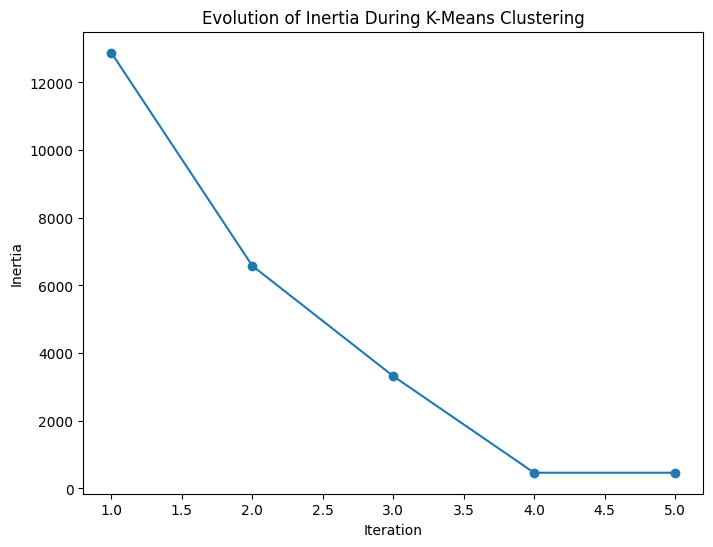

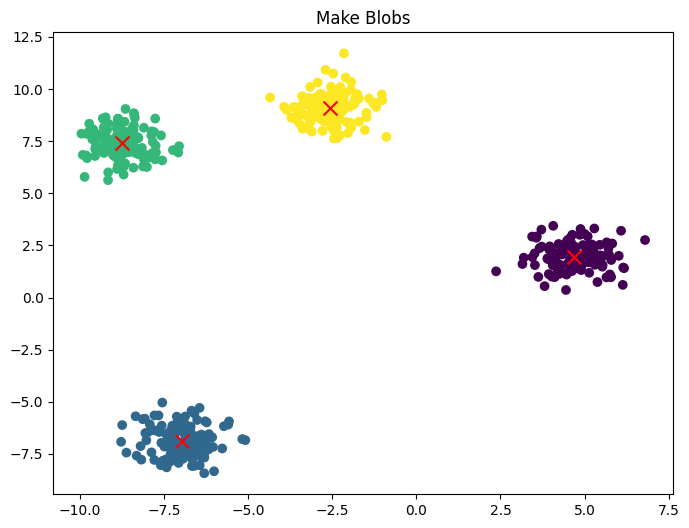

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles, load_iris

# Function to plot the evolution of inertia
def plot_inertia(inertia_values):
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(inertia_values) + 1), inertia_values, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('Inertia')
    plt.title('Evolution of Inertia During K-Means Clustering')
    plt.show()

class KMeans:
    def __init__(self, k=4, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.labels = None
        self.inertia_values = []

    def initialize_centroids(self, X):
        np.random.seed(42)
        random_idx = np.random.permutation(X.shape[0])
        self.centroids = X[random_idx[:self.k]]

    def assign_clusters(self, X):
        distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
        return np.argmin(distances, axis=0)

    def update_centroids(self, X):
        return np.array([X[self.labels == i].mean(axis=0) for i in range(self.k)])

    def compute_inertia(self, X):
        inertia = 0
        for i in range(self.k):
            cluster_points = X[self.labels == i]
            if len(cluster_points) > 0:
                inertia += np.sum((cluster_points - self.centroids[i])**2)
        return inertia

    def fit(self, X):
        self.initialize_centroids(X)
        for _ in range(self.max_iters):
            old_centroids = self.centroids.copy()
            self.labels = self.assign_clusters(X)
            self.centroids = self.update_centroids(X)
            inertia = self.compute_inertia(X)
            self.inertia_values.append(inertia)
            if np.all(old_centroids == self.centroids):
                break
        plot_inertia(self.inertia_values)

# Sample datasets
def get_make_blobs():
    X_blob, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.7, random_state=42)
    return X_blob

def get_multivariate_normal():
    np.random.seed(42)
    points1 = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 100)
    points2 = np.random.multivariate_normal([5, 5], [[1, -0.5], [-0.5, 1]], 100)
    points3 = np.random.multivariate_normal([0, 5], [[1, 0], [0, 1]], 100)
    points4 = np.random.multivariate_normal([5, 0], [[1, 0.5], [0.5, 1]], 100)
    return np.vstack([points1, points2, points3, points4])

def get_make_moons():
    X_moon, _ = make_moons(n_samples=500, noise=0.1, random_state=42)
    return X_moon

def get_make_circles():
    X_circle, _ = make_circles(n_samples=500, factor=0.5, noise=0.05)
    return X_circle

def get_iris():
    iris = load_iris()
    return iris.data[:, :2]

# Choose dataset
datasets = {
    'Make Blobs': get_make_blobs,
    'Multivariate Normal': get_multivariate_normal,
    'Make Moons': get_make_moons,
    'Make Circles': get_make_circles,
    'Iris': get_iris
}

# Select and run dataset
dataset_choice = 'Make Blobs'
X = datasets[dataset_choice]()

# KMeans clustering with evolution performance
kmeans = KMeans(k=4)
kmeans.fit(X)

# Plot final clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x', s=100)
plt.title(dataset_choice)
plt.show()